## Install Dependencies

In [ ]:
'''
Dependencies
'''
import os
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, precision_recall_curve, classification_report,silhouette_score
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import pickle as pk

## Link the file

In [ ]:
# remove all artifacts from dataset other than the factors
path = ''
data = pd.read_excel(path, engine='openpyxl')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 16 columns):
 #   Column                                                                                                                                         Non-Null Count  Dtype
---  ------                                                                                                                                         --------------  -----
 0   PB1: I am willing to buy a product promoted on social media.                                                                                   352 non-null    int64
 1   PB2: There is a high probability that I would purchase a product because of the impact of social media.                                        352 non-null    int64
 2   PB3: I am easily influenced by advertisements on social media to make impulsive purchases.                                                     352 non-null    int64
 3   PB4: I had the experience of buying a pr

## Data Pre-Processing

In [ ]:
'''
We will start with shortening the columns names.
'''

data = data.rename(
    columns={
        "ATTD1: Advertisements on social media can help me to be aware of the existence of a particular product." : "ATTD1",
        "ATTD2: Advertisements on social media attract my attention more easily than that of other advertising channels, such as, television, etc." : "ATTD2",
        "ATTD3: Prominent keywords, such as, \"promotion\" and \"discount\" on social media attract my attention to seek more information about a product." : "ATTD3",
        "ATTD4:  I have purchased products advertised on social media." : "ATTD4",
        "SN1: My family has influence over my purchasing habits through social media marketing." : "SN1",
        "SN2: People around me think that I should purchase products through social media." : "SN2",
        "SN3: I feel good if many people purchased products through social media." : "SN3",
        "SN4: My friends encourage me to purchase products through social media." : "SN4",
        "PBC1: Frequent advertisement of a product on social media often motivates me to purchase it." : "PBC1",
        "PBC2: I will choose social media as a reference channel for purchasing in the future." : "PBC2",
        "PBC3: I will recommend social media channels to my friends to make purchasing decisions." : "PBC3",
        "PBC4: I will recommend social media channels to my family members to make purchasing decisions." : "PBC4",
    }
)
data.head()

,PB1: I am willing to buy a product promoted on social media.,PB2: There is a high probability that I would purchase a product because of the impact of social media.,PB3: I am easily influenced by advertisements on social media to make impulsive purchases.,PB4: I had the experience of buying a product due to the influence of social media.,ATTD1,ATTD2,ATTD3,ATTD4,SN1,SN2,SN3,SN4,PBC1,PBC2,PBC3,PBC4
0,4,5,4,5,4,4,4,5,2,3,3,4,4,5,5,4
1,2,2,2,4,3,4,5,2,2,2,3,2,2,2,2,2
2,2,2,2,3,2,2,4,3,2,2,3,3,1,2,3,3
3,2,3,2,4,2,3,3,2,1,3,2,3,2,3,2,2
4,2,3,4,4,3,4,4,5,3,4,4,4,3,3,2,2


In [ ]:
'''
We will now proceed with data cleaning and drop columns that are not related to our primary constructs.
'''
# Drop first 13 columns
# data = data.drop(columns = data.columns[:13])

# # Drop last 8 columns
# data = data.drop(columns = data.columns[-8:])

'\nWe will now proceed with data cleaning and drop columns that are not related to our primary constructs.\n'

Using cronbachs alpha test, we have determined that PB1,..,PB4 all factors can be considered as a single factor and hence we will be taking an average of them to create a new factor called "PB" and we will use min-max normalization to further normalize the data.

In [ ]:
data['PB'] = (data['PB1: I am willing to buy a product promoted on social media.']
              + data['PB2: There is a high probability that I would purchase a product because of the impact of social media.']
              + data['PB3: I am easily influenced by advertisements on social media to make impulsive purchases.']
              + data['PB4: I had the experience of buying a product due to the influence of social media.'])/4

In [ ]:
'''
We shall now drop the redundant columns for clarity.
'''
data = data.drop(columns=data.columns[:4])
data.head()

,ATTD1,ATTD2,ATTD3,ATTD4,SN1,SN2,SN3,SN4,PBC1,PBC2,PBC3,PBC4,PB
0,4,4,4,5,2,3,3,4,4,5,5,4,4.50
1,3,4,5,2,2,2,3,2,2,2,2,2,2.50
2,2,2,4,3,2,2,3,3,1,2,3,3,2.25
3,2,3,3,2,1,3,2,3,2,3,2,2,2.75
4,3,4,4,5,3,4,4,4,3,3,2,2,3.25


### Labeling y-hat

In [ ]:
data['y'] = data['PB'].apply(lambda x: 1 if x >= 2.5 else 0)
data.head()

,ATTD1,ATTD2,ATTD3,ATTD4,SN1,SN2,SN3,SN4,PBC1,PBC2,PBC3,PBC4,PB,y
0,4,4,4,5,2,3,3,4,4,5,5,4,4.50,1
1,3,4,5,2,2,2,3,2,2,2,2,2,2.50,1
2,2,2,4,3,2,2,3,3,1,2,3,3,2.25,0
3,2,3,3,2,1,3,2,3,2,3,2,2,2.75,1
4,3,4,4,5,3,4,4,4,3,3,2,2,3.25,1


### Data Splitting


In [ ]:
X = data.drop(columns=['y', 'PB'])
y = data['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

In [ ]:
y_test.value_counts()

,count
y,
1,58
0,13


## Hyper-Parameter Optimization

In [ ]:
'''
Parameters to be optimized
'''

param_grids = {
    'mlp': {
        'mlp__hidden_layer_sizes': [(50,), (100,), (50, 50)],
        'mlp__activation': ['tanh', 'relu', 'logistic'],
        'mlp__solver': ['sgd', 'adam'],
        'mlp__alpha': [0.0001, 0.001],
        'mlp__learning_rate': ['constant', 'adaptive']
    },
    'svm': {
        'svm__C': [0.1, 1, 10],
        'svm__kernel': ['linear', 'rbf', 'poly'],
        'svm__gamma': ['scale', 'auto']
    },
    'logistic_regression': {
        'logistic_regression__C': [0.1, 1, 10],
        'logistic_regression__penalty': ['l1', 'l2'],
        'logistic_regression__solver': ['liblinear']
    },
    'knn': {
        'knn__n_neighbors': [3, 5, 7],
        'knn__weights': ['uniform', 'distance'],
        'knn__metric': ['euclidean', 'manhattan']
    },
    'decision_tree': {
        'decision_tree__criterion': ['gini', 'entropy'],
        'decision_tree__max_depth': [None, 10, 20],
        'decision_tree__min_samples_split': [2, 5, 10]
    },
    'adaboost': {
        'adaboost__n_estimators': [50, 100, 200],
        'adaboost__learning_rate': [0.01, 0.1, 1]
    },
    'random_forest': {
        'random_forest__n_estimators': [100, 200, 500],
        'random_forest__max_features': ['sqrt', 'log2'],
        'random_forest__max_depth': [None, 10, 20]
    },
    'gradient_boosting': {
        'gradient_boosting__n_estimators': [100, 200, 300, 400, 500],
        'gradient_boosting__learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
        'gradient_boosting__max_depth': [3, 4, 5, 6, 7]
    },

}


In [ ]:
models = {
    'logistic_regression': LogisticRegression(),
    'mlp': MLPClassifier(max_iter=1000),
    'svm': SVC(probability=True),
    'knn': KNeighborsClassifier(),
    'decision_tree': DecisionTreeClassifier(),
    'adaboost': AdaBoostClassifier(),
    'random_forest': RandomForestClassifier(),
    'gradient_boosting': GradientBoostingClassifier(),

}
scaler = StandardScaler()

In [ ]:
def hyperparameter_optimization(X_train, y_train, X_test, y_test, comb, models, param_grids, cv_folds=5):
    if not os.path.exists(comb):
        os.makedirs(comb)

    print(f"__________________________________________{comb}__________________________________________\n")
    best_params = {}
    best_scores = {}
    test_scores = {}
    confusion_matrices = {}
    roc_curves = {}
    pr_curves = {}

    kf = KFold(n_splits=cv_folds, shuffle=True, random_state=42)

    for model_name, model in models.items():
        print(f"Optimizing hyperparameters for {comb} {model_name}...")

        # In this pipeline we used standardization of the columns.
        pipeline = Pipeline([
            # ('scaler', StandardScaler()),
            (model_name, model)
        ])

        # Get parameter grid
        param_grid = param_grids.get(model_name, {})

        # Perform grid search
        grid_search = GridSearchCV(pipeline, param_grid, cv=kf, n_jobs=-1, scoring='accuracy')
        grid_search.fit(X_train, y_train)

        # Store best parameters and best score
        best_params[model_name] = grid_search.best_params_
        best_scores[model_name] = grid_search.best_score_

        print(f"Best parameters for {model_name}: {grid_search.best_params_}")
        print(f"Best cross-validation score for {model_name}: {grid_search.best_score_:.2f}\n")

        # Test the model with best parameters on the whole dataset
        best_model = grid_search.best_estimator_
        y_pred = best_model.predict(X_test)
        y_prob = best_model.predict_proba(X_test)[:, 1] if hasattr(best_model, "predict_proba") else best_model.decision_function(X_test)

        test_score = round(accuracy_score(y_test, y_pred),2)
        test_scores[model_name] = test_score

        # Confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        confusion_matrices[model_name] = cm

        # ROC curve
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)
        roc_curves[model_name] = (fpr, tpr, roc_auc)

        # Precision-Recall curve
        precision, recall, _ = precision_recall_curve(y_test, y_prob)
        pr_curves[model_name] = (precision, recall)

        print(f"Test score for {model_name} with best parameters: {test_score:.2f}")
        print(f"Confusion Matrix:\n{cm}")
        print(f"Classification Report:\n{classification_report(y_test, y_pred)}\n")

    return best_params, best_scores, test_scores, confusion_matrices, roc_curves, pr_curves


## Plotting Functions

In [ ]:
def plot_figures():
    if not os.path.exists(comb):
      os.makedirs(comb)

    # ROC Curves
    plt.figure()
    sns.set(style="whitegrid")
    for model_name in models.keys():
        fpr, tpr, roc_auc = roc_curves[model_name]
        plt.plot(fpr, tpr, linestyle=':', label=f'{model_name} (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve of {comb}')
    plt.legend(loc="lower right", prop={'size':8})
    plt.savefig(os.path.join(comb, 'Combined_ROC_curve.png'))
    plt.show()

    # Precision-Recall Curves
    plt.figure()
    for model_name in models.keys():
        precision, recall = pr_curves[model_name]
        pr_auc = auc(recall, precision)  # Calculate AUC for Precision-Recall curve
        plt.plot(recall, precision, linestyle=':', label=f'{model_name} (area = {pr_auc:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision Recall Curve of {comb}')
    plt.legend(loc="lower left", prop={'size':8})
    plt.savefig(os.path.join(comb, f'Combined_Precision_Recall_curve{comb}.png'))
    plt.show()




In [ ]:
def plot_learning_curve(model):
  # Learning Curves
    cv = 5  # Number of cross-validation folds
    plt.figure()
    for model_name, model in models.items():
        train_sizes, train_scores, valid_scores = learning_curve(
            model, X_train, y_train, cv=cv, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
        )

        train_mean = np.mean(train_scores, axis=1)
        train_std = np.std(train_scores, axis=1)
        valid_mean = np.mean(valid_scores, axis=1)
        valid_std = np.std(valid_scores, axis=1)

        plt.plot(train_sizes, train_mean, 'o-', linestyle=':', label=f'{model_name} Training score')
        plt.plot(train_sizes, valid_mean, 'o-', linestyle='-', label=f'{model_name} Validation score')
        plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
        plt.fill_between(train_sizes, valid_mean - valid_std, valid_mean + valid_std, alpha=0.1)

    plt.xlabel('Training examples')
    plt.ylabel('Score')
    plt.title(f'Learning Curves for {comb}')
    plt.legend(loc='best', prop={'size': 8})
    plt.grid()
    plt.savefig(os.path.join(comb, f'Combined_Learning_curve{comb}.png'))
    plt.show()

In [ ]:
def plot_confusion_matrix(model):

  cm = confusion_matrices[model]

  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt="d", cmap= sns.color_palette("flare_r", as_cmap=True),
                xticklabels=['Predicted Negative', 'Predicted Positive'],
                yticklabels=['Actual Negative', 'Actual Positive'])
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.title(f'Confusion Matrix of Best Performing Model : {model} in {comb}.png')
  plt.savefig(os.path.join(comb, f'Confusion_matrix_{comb}.png'))
  plt.show()


## Find Hyperparameter and Train model on 7 different combinations

## ATTD & SN & PBC

In [ ]:
comb = "ATTD,SN & PBC"
best_params, best_scores, test_scores, confusion_matrices, roc_curves, pr_curves = hyperparameter_optimization(X_train, y_train,X_test, y_test, comb, models, param_grids)

__________________________________________ATTD,SN & PBC__________________________________________

Optimizing hyperparameters for ATTD,SN & PBC logistic_regression...
Best parameters for logistic_regression: {'logistic_regression__C': 10, 'logistic_regression__penalty': 'l1', 'logistic_regression__solver': 'liblinear'}
Best cross-validation score for logistic_regression: 0.87

Test score for logistic_regression with best parameters: 0.90
Confusion Matrix:
[[ 8  5]
 [ 2 56]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.62      0.70        13
           1       0.92      0.97      0.94        58

    accuracy                           0.90        71
   macro avg       0.86      0.79      0.82        71
weighted avg       0.90      0.90      0.90        71


Optimizing hyperparameters for ATTD,SN & PBC mlp...
Best parameters for mlp: {'mlp__activation': 'tanh', 'mlp__alpha': 0.0001, 'mlp__hidden_layer_sizes': (50, 50), 'mlp__

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Best parameters for adaboost: {'adaboost__learning_rate': 0.1, 'adaboost__n_estimators': 100}
Best cross-validation score for adaboost: 0.86

Test score for adaboost with best parameters: 0.92
Confusion Matrix:
[[ 9  4]
 [ 2 56]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.69      0.75        13
           1       0.93      0.97      0.95        58

    accuracy                           0.92        71
   macro avg       0.88      0.83      0.85        71
weighted avg       0.91      0.92      0.91        71


Optimizing hyperparameters for ATTD,SN & PBC random_forest...
Best parameters for random_forest: {'random_forest__max_depth': 10, 'random_forest__max_features': 'log2', 'random_forest__n_estimators': 200}
Best cross-validation score for random_forest: 0.88

Test score for random_forest with best parameters: 0.87
Confusion Matrix:
[[ 7  6]
 [ 3 55]]
Classification Report:
              precision    recall  f1-score  

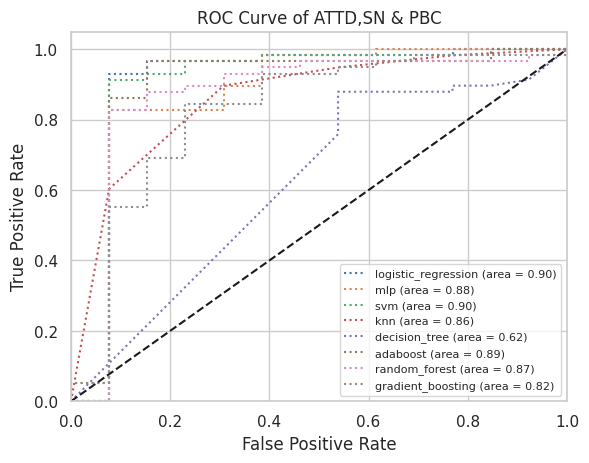

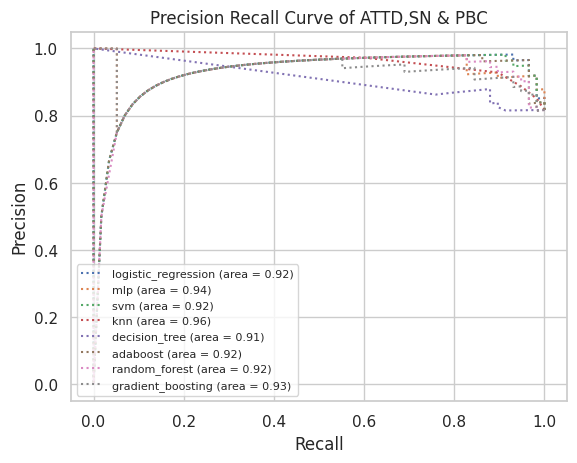

In [ ]:
plot_figures()

In [ ]:
best_params, test_scores

({'logistic_regression': {'logistic_regression__C': 10,
   'logistic_regression__penalty': 'l1',
   'logistic_regression__solver': 'liblinear'},
  'mlp': {'mlp__activation': 'tanh',
   'mlp__alpha': 0.0001,
   'mlp__hidden_layer_sizes': (50, 50),
   'mlp__learning_rate': 'adaptive',
   'mlp__solver': 'adam'},
  'svm': {'svm__C': 10, 'svm__gamma': 'scale', 'svm__kernel': 'linear'},
  'knn': {'knn__metric': 'euclidean',
   'knn__n_neighbors': 5,
   'knn__weights': 'uniform'},
  'decision_tree': {'decision_tree__criterion': 'entropy',
   'decision_tree__max_depth': None,
   'decision_tree__min_samples_split': 10},
  'adaboost': {'adaboost__learning_rate': 0.1, 'adaboost__n_estimators': 100},
  'random_forest': {'random_forest__max_depth': 10,
   'random_forest__max_features': 'log2',
   'random_forest__n_estimators': 200},
  'gradient_boosting': {'gradient_boosting__learning_rate': 0.05,
   'gradient_boosting__max_depth': 5,
   'gradient_boosting__n_estimators': 300}},
 {'logistic_regress

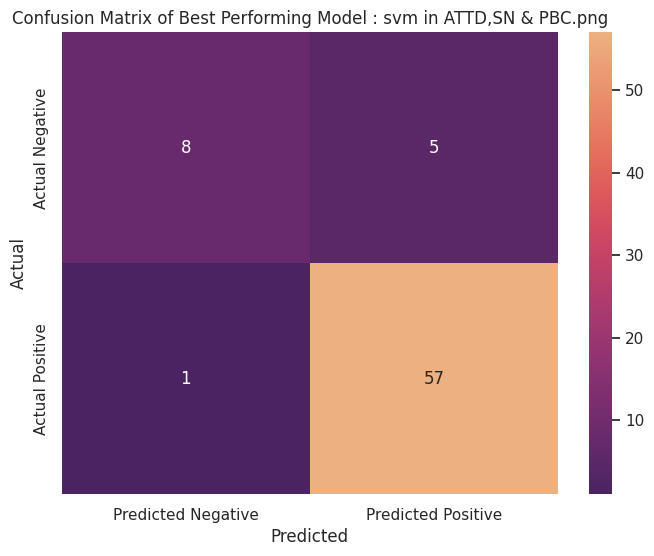

In [ ]:
plot_confusion_matrix('svm')


## ATTD & SN

In [ ]:
X_tr = X_train.drop(columns = X_train.columns[8:])
X_tr.head()
X_tst = X_test.drop(columns = X_test.columns[8:])
X_tst.head()

,ATTD1,ATTD2,ATTD3,ATTD4,SN1,SN2,SN3,SN4
261,3,3,3,4,1,4,3,3
330,3,3,3,2,4,4,3,3
292,3,3,2,2,3,3,3,4
6,3,4,3,2,3,3,3,4
263,3,3,3,5,1,2,3,1


In [ ]:
comb = "ATTD & SN"
best_params, best_scores, test_scores, confusion_matrices, roc_curves, pr_curves = hyperparameter_optimization(X_tr, y_train,X_tst, y_test, comb, models, param_grids)

__________________________________________ATTD & SN__________________________________________

Optimizing hyperparameters for ATTD & SN logistic_regression...
Best parameters for logistic_regression: {'logistic_regression__C': 10, 'logistic_regression__penalty': 'l1', 'logistic_regression__solver': 'liblinear'}
Best cross-validation score for logistic_regression: 0.85

Test score for logistic_regression with best parameters: 0.90
Confusion Matrix:
[[ 9  4]
 [ 3 55]]
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.69      0.72        13
           1       0.93      0.95      0.94        58

    accuracy                           0.90        71
   macro avg       0.84      0.82      0.83        71
weighted avg       0.90      0.90      0.90        71


Optimizing hyperparameters for ATTD & SN mlp...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Best parameters for mlp: {'mlp__activation': 'tanh', 'mlp__alpha': 0.001, 'mlp__hidden_layer_sizes': (50, 50), 'mlp__learning_rate': 'constant', 'mlp__solver': 'adam'}
Best cross-validation score for mlp: 0.85

Test score for mlp with best parameters: 0.82
Confusion Matrix:
[[ 7  6]
 [ 7 51]]
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.54      0.52        13
           1       0.89      0.88      0.89        58

    accuracy                           0.82        71
   macro avg       0.70      0.71      0.70        71
weighted avg       0.82      0.82      0.82        71


Optimizing hyperparameters for ATTD & SN svm...
Best parameters for svm: {'svm__C': 1, 'svm__gamma': 'scale', 'svm__kernel': 'linear'}
Best cross-validation score for svm: 0.85

Test score for svm with best parameters: 0.85
Confusion Matrix:
[[ 5  8]
 [ 3 55]]
Classification Report:
              precision    recall  f1-score   support

           0    

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Best parameters for adaboost: {'adaboost__learning_rate': 0.1, 'adaboost__n_estimators': 100}
Best cross-validation score for adaboost: 0.85

Test score for adaboost with best parameters: 0.82
Confusion Matrix:
[[ 5  8]
 [ 5 53]]
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.38      0.43        13
           1       0.87      0.91      0.89        58

    accuracy                           0.82        71
   macro avg       0.68      0.65      0.66        71
weighted avg       0.80      0.82      0.81        71


Optimizing hyperparameters for ATTD & SN random_forest...
Best parameters for random_forest: {'random_forest__max_depth': 10, 'random_forest__max_features': 'log2', 'random_forest__n_estimators': 500}
Best cross-validation score for random_forest: 0.85

Test score for random_forest with best parameters: 0.82
Confusion Matrix:
[[ 6  7]
 [ 6 52]]
Classification Report:
              precision    recall  f1-score   sup

In [ ]:
best_params, test_scores

({'logistic_regression': {'logistic_regression__C': 10,
   'logistic_regression__penalty': 'l1',
   'logistic_regression__solver': 'liblinear'},
  'mlp': {'mlp__activation': 'tanh',
   'mlp__alpha': 0.001,
   'mlp__hidden_layer_sizes': (50, 50),
   'mlp__learning_rate': 'constant',
   'mlp__solver': 'adam'},
  'svm': {'svm__C': 1, 'svm__gamma': 'scale', 'svm__kernel': 'linear'},
  'knn': {'knn__metric': 'euclidean',
   'knn__n_neighbors': 5,
   'knn__weights': 'uniform'},
  'decision_tree': {'decision_tree__criterion': 'entropy',
   'decision_tree__max_depth': 10,
   'decision_tree__min_samples_split': 10},
  'adaboost': {'adaboost__learning_rate': 0.1, 'adaboost__n_estimators': 100},
  'random_forest': {'random_forest__max_depth': 10,
   'random_forest__max_features': 'log2',
   'random_forest__n_estimators': 500},
  'gradient_boosting': {'gradient_boosting__learning_rate': 0.01,
   'gradient_boosting__max_depth': 3,
   'gradient_boosting__n_estimators': 100}},
 {'logistic_regression'

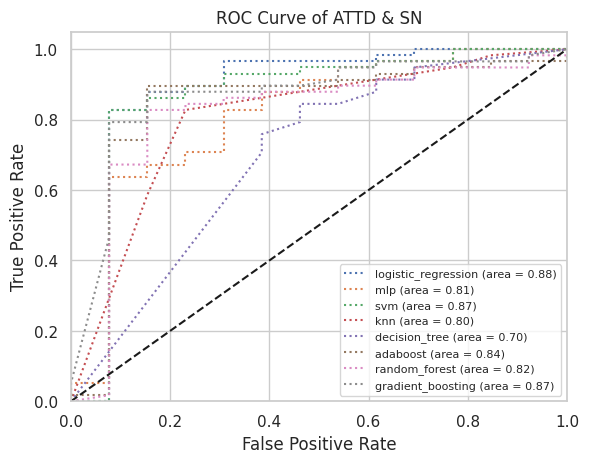

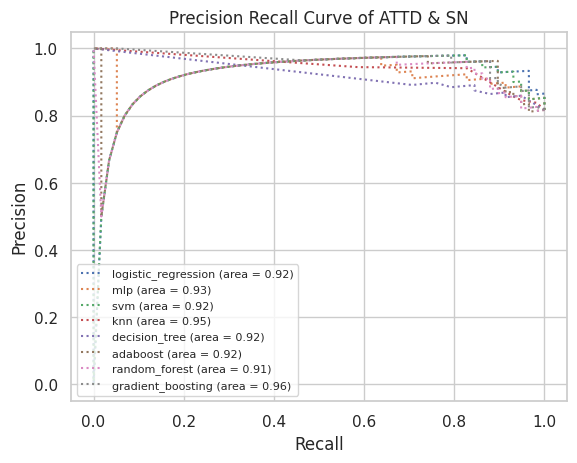

In [ ]:
plot_figures()

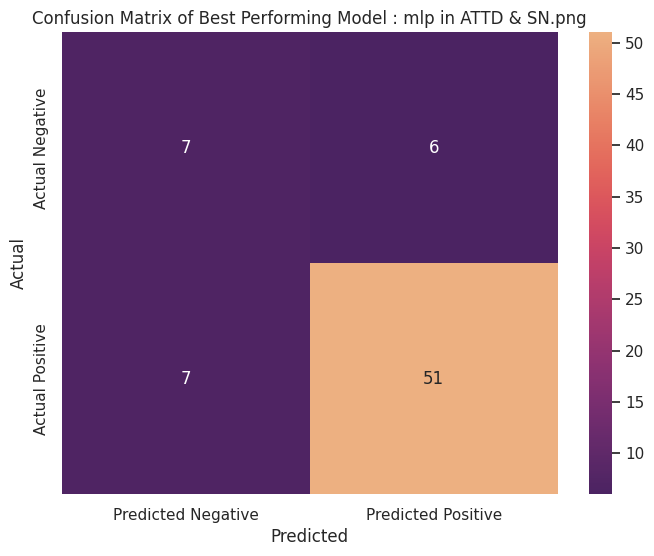

In [ ]:
plot_confusion_matrix('mlp')

## Attitude & PBC

In [ ]:
comb = "ATTD & PBC"
X_tr = X_train.drop(columns=X_train.columns[4:8])
X_tst = X_test.drop(columns=X_test.columns[4:8])
X_tr.head()

,ATTD1,ATTD2,ATTD3,ATTD4,PBC1,PBC2,PBC3,PBC4
8,5,5,5,5,5,5,5,5
179,3,4,4,4,3,4,3,4
334,3,2,4,4,4,3,3,3
94,5,5,4,5,2,4,4,5
141,4,5,4,4,2,4,4,4


In [ ]:
best_params, best_scores, test_scores, confusion_matrices, roc_curves, pr_curves = hyperparameter_optimization(X_tr, y_train, X_tst, y_test, comb, models, param_grids)

__________________________________________ATTD & PBC__________________________________________

Optimizing hyperparameters for ATTD & PBC logistic_regression...
Best parameters for logistic_regression: {'logistic_regression__C': 10, 'logistic_regression__penalty': 'l1', 'logistic_regression__solver': 'liblinear'}
Best cross-validation score for logistic_regression: 0.85

Test score for logistic_regression with best parameters: 0.86
Confusion Matrix:
[[ 5  8]
 [ 2 56]]
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.38      0.50        13
           1       0.88      0.97      0.92        58

    accuracy                           0.86        71
   macro avg       0.79      0.68      0.71        71
weighted avg       0.85      0.86      0.84        71


Optimizing hyperparameters for ATTD & PBC mlp...
Best parameters for mlp: {'mlp__activation': 'tanh', 'mlp__alpha': 0.0001, 'mlp__hidden_layer_sizes': (50, 50), 'mlp__learning_

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Best parameters for adaboost: {'adaboost__learning_rate': 0.1, 'adaboost__n_estimators': 200}
Best cross-validation score for adaboost: 0.86

Test score for adaboost with best parameters: 0.83
Confusion Matrix:
[[ 4  9]
 [ 3 55]]
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.31      0.40        13
           1       0.86      0.95      0.90        58

    accuracy                           0.83        71
   macro avg       0.72      0.63      0.65        71
weighted avg       0.81      0.83      0.81        71


Optimizing hyperparameters for ATTD & PBC random_forest...
Best parameters for random_forest: {'random_forest__max_depth': 10, 'random_forest__max_features': 'log2', 'random_forest__n_estimators': 200}
Best cross-validation score for random_forest: 0.86

Test score for random_forest with best parameters: 0.83
Confusion Matrix:
[[ 4  9]
 [ 3 55]]
Classification Report:
              precision    recall  f1-score   su

In [ ]:
test_scores

{'logistic_regression': 0.86,
 'mlp': 0.8,
 'svm': 0.85,
 'knn': 0.8,
 'decision_tree': 0.79,
 'adaboost': 0.83,
 'random_forest': 0.83,
 'gradient_boosting': 0.83}

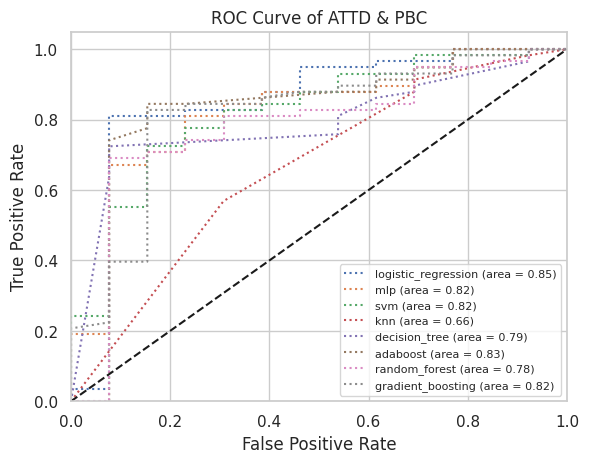

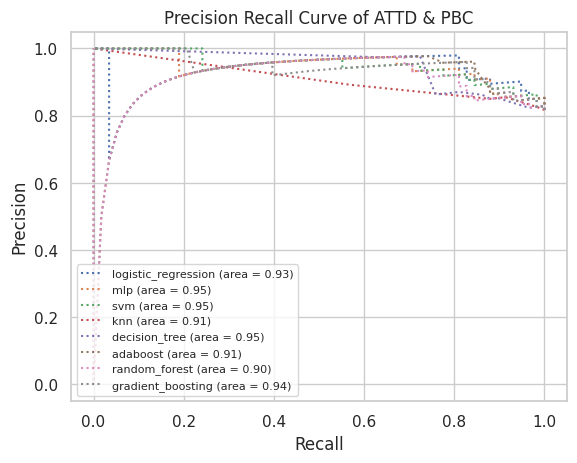

In [ ]:
plot_figures()

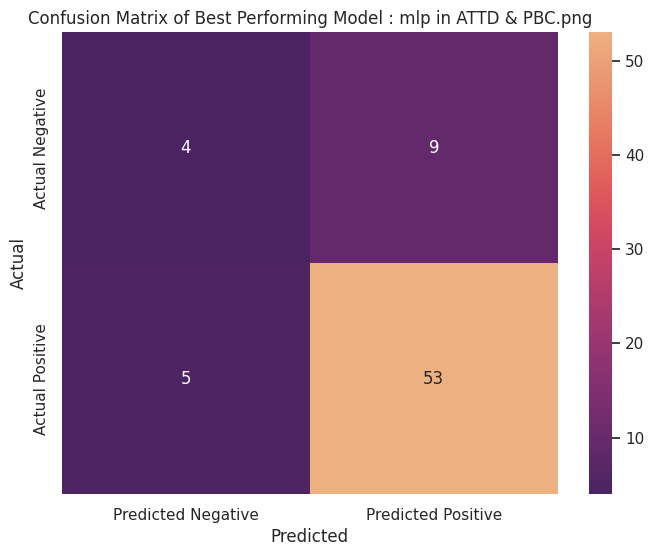

In [ ]:
plot_confusion_matrix('mlp')

## SN and PBC

In [ ]:
comb = "SN & PBC"
X_tr = X_train.drop(columns=X_train.columns[:4])
X_tst = X_test.drop(columns=X_test.columns[:4])
X_tr.head()

,SN1,SN2,SN3,SN4,PBC1,PBC2,PBC3,PBC4
8,5,5,5,5,5,5,5,5
179,1,2,3,3,3,4,3,4
334,3,4,3,3,4,3,3,3
94,4,3,3,4,2,4,4,5
141,2,2,3,2,2,4,4,4


In [ ]:
best_params, best_scores, test_scores, confusion_matrices, roc_curves, pr_curves = hyperparameter_optimization(X_tr, y_train, X_tst, y_test, comb, models, param_grids)

__________________________________________SN & PBC__________________________________________

Optimizing hyperparameters for SN & PBC logistic_regression...
Best parameters for logistic_regression: {'logistic_regression__C': 10, 'logistic_regression__penalty': 'l2', 'logistic_regression__solver': 'liblinear'}
Best cross-validation score for logistic_regression: 0.86

Test score for logistic_regression with best parameters: 0.87
Confusion Matrix:
[[ 6  7]
 [ 2 56]]
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.46      0.57        13
           1       0.89      0.97      0.93        58

    accuracy                           0.87        71
   macro avg       0.82      0.71      0.75        71
weighted avg       0.86      0.87      0.86        71


Optimizing hyperparameters for SN & PBC mlp...
Best parameters for mlp: {'mlp__activation': 'logistic', 'mlp__alpha': 0.0001, 'mlp__hidden_layer_sizes': (50, 50), 'mlp__learning_ra

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Best parameters for adaboost: {'adaboost__learning_rate': 0.01, 'adaboost__n_estimators': 200}
Best cross-validation score for adaboost: 0.87

Test score for adaboost with best parameters: 0.79
Confusion Matrix:
[[ 0 13]
 [ 2 56]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.81      0.97      0.88        58

    accuracy                           0.79        71
   macro avg       0.41      0.48      0.44        71
weighted avg       0.66      0.79      0.72        71


Optimizing hyperparameters for SN & PBC random_forest...
Best parameters for random_forest: {'random_forest__max_depth': 10, 'random_forest__max_features': 'sqrt', 'random_forest__n_estimators': 500}
Best cross-validation score for random_forest: 0.85

Test score for random_forest with best parameters: 0.86
Confusion Matrix:
[[ 5  8]
 [ 2 56]]
Classification Report:
              precision    recall  f1-score   sup

In [ ]:
test_scores

{'logistic_regression': 0.87,
 'mlp': 0.87,
 'svm': 0.86,
 'knn': 0.85,
 'decision_tree': 0.82,
 'adaboost': 0.79,
 'random_forest': 0.86,
 'gradient_boosting': 0.79}

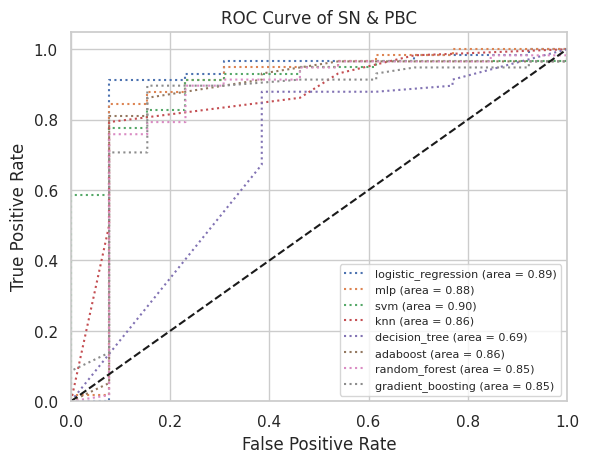

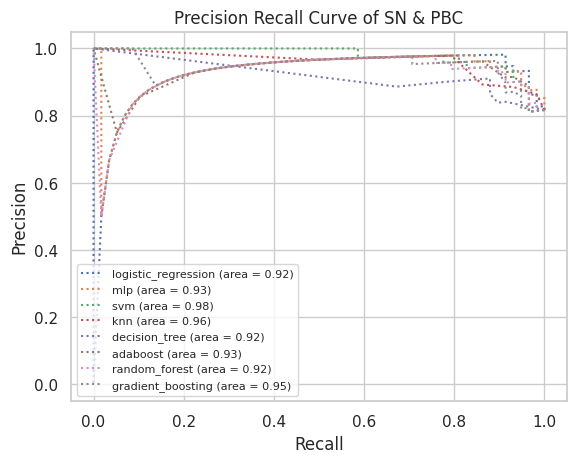

In [ ]:
plot_figures()

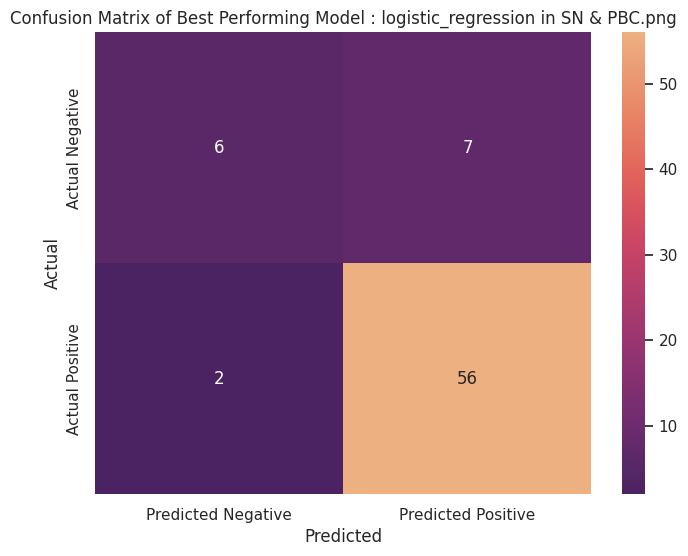

In [ ]:
plot_confusion_matrix( 'logistic_regression')

## ATTD

In [ ]:
comb = "ATTD"
X_tr = X_train.drop(columns=X_train.columns[4:])
X_tst = X_test.drop(columns=X_test.columns[4:])
X_tr.head()

,ATTD1,ATTD2,ATTD3,ATTD4
8,5,5,5,5
179,3,4,4,4
334,3,2,4,4
94,5,5,4,5
141,4,5,4,4


In [ ]:
best_params, best_scores, test_scores, confusion_matrices, roc_curves, pr_curves = hyperparameter_optimization(X_tr, y_train, X_tst, y_test, comb, models, param_grids)

__________________________________________ATTD__________________________________________

Optimizing hyperparameters for ATTD logistic_regression...
Best parameters for logistic_regression: {'logistic_regression__C': 10, 'logistic_regression__penalty': 'l1', 'logistic_regression__solver': 'liblinear'}
Best cross-validation score for logistic_regression: 0.84

Test score for logistic_regression with best parameters: 0.82
Confusion Matrix:
[[ 3 10]
 [ 3 55]]
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.23      0.32        13
           1       0.85      0.95      0.89        58

    accuracy                           0.82        71
   macro avg       0.67      0.59      0.61        71
weighted avg       0.78      0.82      0.79        71


Optimizing hyperparameters for ATTD mlp...
Best parameters for mlp: {'mlp__activation': 'tanh', 'mlp__alpha': 0.001, 'mlp__hidden_layer_sizes': (50,), 'mlp__learning_rate': 'adaptive', 'ml

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Best parameters for adaboost: {'adaboost__learning_rate': 0.01, 'adaboost__n_estimators': 50}
Best cross-validation score for adaboost: 0.84

Test score for adaboost with best parameters: 0.85
Confusion Matrix:
[[ 2 11]
 [ 0 58]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.15      0.27        13
           1       0.84      1.00      0.91        58

    accuracy                           0.85        71
   macro avg       0.92      0.58      0.59        71
weighted avg       0.87      0.85      0.79        71


Optimizing hyperparameters for ATTD random_forest...
Best parameters for random_forest: {'random_forest__max_depth': 10, 'random_forest__max_features': 'sqrt', 'random_forest__n_estimators': 500}
Best cross-validation score for random_forest: 0.83

Test score for random_forest with best parameters: 0.82
Confusion Matrix:
[[ 4  9]
 [ 4 54]]
Classification Report:
              precision    recall  f1-score   support


In [ ]:
best_params

{'logistic_regression': {'logistic_regression__C': 10,
  'logistic_regression__penalty': 'l1',
  'logistic_regression__solver': 'liblinear'},
 'mlp': {'mlp__activation': 'tanh',
  'mlp__alpha': 0.001,
  'mlp__hidden_layer_sizes': (50,),
  'mlp__learning_rate': 'adaptive',
  'mlp__solver': 'adam'},
 'svm': {'svm__C': 1, 'svm__gamma': 'scale', 'svm__kernel': 'poly'},
 'knn': {'knn__metric': 'euclidean',
  'knn__n_neighbors': 7,
  'knn__weights': 'uniform'},
 'decision_tree': {'decision_tree__criterion': 'entropy',
  'decision_tree__max_depth': None,
  'decision_tree__min_samples_split': 10},
 'adaboost': {'adaboost__learning_rate': 0.01, 'adaboost__n_estimators': 50},
 'random_forest': {'random_forest__max_depth': 10,
  'random_forest__max_features': 'sqrt',
  'random_forest__n_estimators': 500},
 'gradient_boosting': {'gradient_boosting__learning_rate': 0.01,
  'gradient_boosting__max_depth': 4,
  'gradient_boosting__n_estimators': 100}}

In [ ]:
test_scores

{'logistic_regression': 0.82,
 'mlp': 0.82,
 'svm': 0.83,
 'knn': 0.77,
 'decision_tree': 0.79,
 'adaboost': 0.85,
 'random_forest': 0.82,
 'gradient_boosting': 0.85}

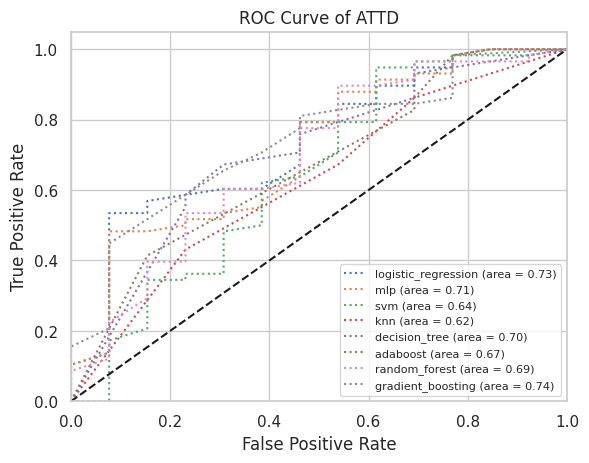

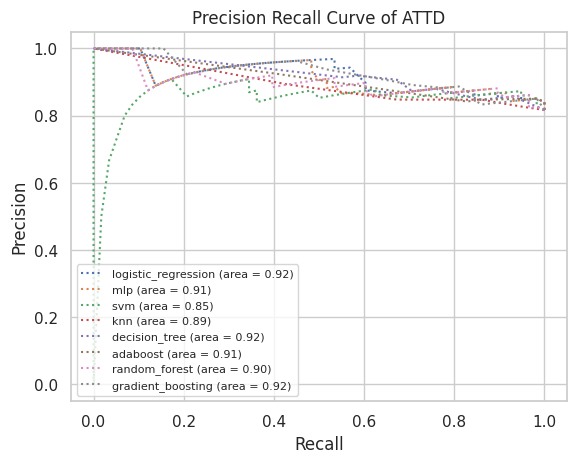

In [ ]:
plot_figures()

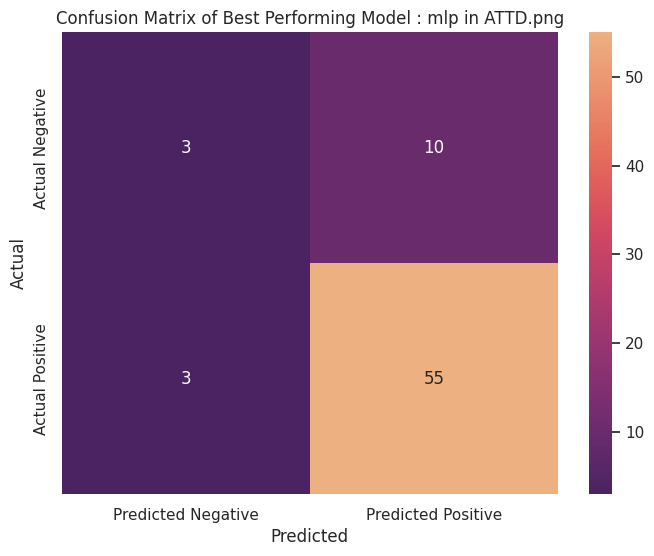

In [ ]:
plot_confusion_matrix('mlp')

## SN

In [ ]:
X_train.head()

,ATTD1,ATTD2,ATTD3,ATTD4,SN1,SN2,SN3,SN4,PBC1,PBC2,PBC3,PBC4
8,5,5,5,5,5,5,5,5,5,5,5,5
179,3,4,4,4,1,2,3,3,3,4,3,4
334,3,2,4,4,3,4,3,3,4,3,3,3
94,5,5,4,5,4,3,3,4,2,4,4,5
141,4,5,4,4,2,2,3,2,2,4,4,4


In [ ]:
comb = "SN"
X_tr = X_train.iloc[:, [6,7,8,9]]
X_tst = X_test.iloc[:, [6,7,8,9]]
X_tr.head()

,SN3,SN4,PBC1,PBC2
8,5,5,5,5
179,3,3,3,4
334,3,3,4,3
94,3,4,2,4
141,3,2,2,4


In [ ]:
best_params, best_scores, test_scores, confusion_matrices, roc_curves, pr_curves = hyperparameter_optimization(X_tr, y_train, X_tst, y_test, comb, models, param_grids)

__________________________________________SN__________________________________________

Optimizing hyperparameters for SN logistic_regression...
Best parameters for logistic_regression: {'logistic_regression__C': 1, 'logistic_regression__penalty': 'l1', 'logistic_regression__solver': 'liblinear'}
Best cross-validation score for logistic_regression: 0.86

Test score for logistic_regression with best parameters: 0.86
Confusion Matrix:
[[ 5  8]
 [ 2 56]]
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.38      0.50        13
           1       0.88      0.97      0.92        58

    accuracy                           0.86        71
   macro avg       0.79      0.68      0.71        71
weighted avg       0.85      0.86      0.84        71


Optimizing hyperparameters for SN mlp...
Best parameters for mlp: {'mlp__activation': 'relu', 'mlp__alpha': 0.0001, 'mlp__hidden_layer_sizes': (50,), 'mlp__learning_rate': 'adaptive', 'mlp__sol

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Best parameters for adaboost: {'adaboost__learning_rate': 0.1, 'adaboost__n_estimators': 50}
Best cross-validation score for adaboost: 0.86

Test score for adaboost with best parameters: 0.79
Confusion Matrix:
[[ 0 13]
 [ 2 56]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.81      0.97      0.88        58

    accuracy                           0.79        71
   macro avg       0.41      0.48      0.44        71
weighted avg       0.66      0.79      0.72        71


Optimizing hyperparameters for SN random_forest...
Best parameters for random_forest: {'random_forest__max_depth': 10, 'random_forest__max_features': 'log2', 'random_forest__n_estimators': 100}
Best cross-validation score for random_forest: 0.84

Test score for random_forest with best parameters: 0.85
Confusion Matrix:
[[ 6  7]
 [ 4 54]]
Classification Report:
              precision    recall  f1-score   support

  

In [ ]:
test_scores

{'logistic_regression': 0.86,
 'mlp': 0.83,
 'svm': 0.83,
 'knn': 0.86,
 'decision_tree': 0.83,
 'adaboost': 0.79,
 'random_forest': 0.85,
 'gradient_boosting': 0.79}

In [ ]:
best_params

{'logistic_regression': {'logistic_regression__C': 1,
  'logistic_regression__penalty': 'l1',
  'logistic_regression__solver': 'liblinear'},
 'mlp': {'mlp__activation': 'relu',
  'mlp__alpha': 0.0001,
  'mlp__hidden_layer_sizes': (50,),
  'mlp__learning_rate': 'adaptive',
  'mlp__solver': 'adam'},
 'svm': {'svm__C': 10, 'svm__gamma': 'scale', 'svm__kernel': 'linear'},
 'knn': {'knn__metric': 'manhattan',
  'knn__n_neighbors': 7,
  'knn__weights': 'uniform'},
 'decision_tree': {'decision_tree__criterion': 'gini',
  'decision_tree__max_depth': None,
  'decision_tree__min_samples_split': 10},
 'adaboost': {'adaboost__learning_rate': 0.1, 'adaboost__n_estimators': 50},
 'random_forest': {'random_forest__max_depth': 10,
  'random_forest__max_features': 'log2',
  'random_forest__n_estimators': 100},
 'gradient_boosting': {'gradient_boosting__learning_rate': 0.01,
  'gradient_boosting__max_depth': 4,
  'gradient_boosting__n_estimators': 100}}

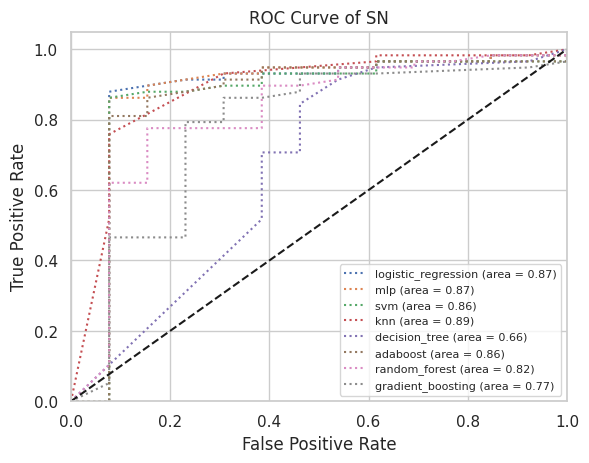

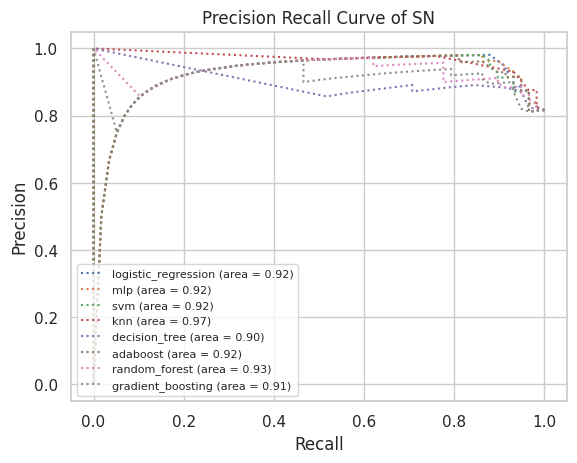

In [ ]:
plot_figures()

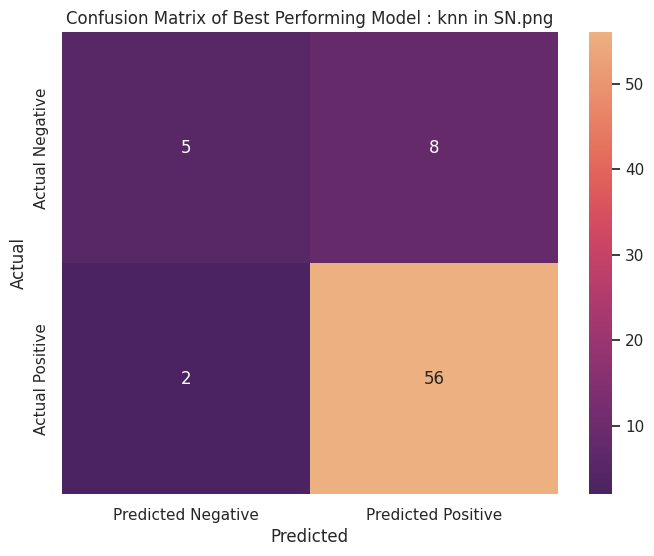

In [ ]:
plot_confusion_matrix('knn')

## PBC

In [ ]:
comb = "PBC"
X_tr = X_train.drop(columns = X_train.columns[:8])
X_tst = X_test.drop(columns = X_test.columns[:8])
X_tst.head()

,PBC1,PBC2,PBC3,PBC4
261,4,2,3,2
330,1,2,2,3
292,5,4,4,5
6,4,2,4,4
263,3,3,3,3


In [ ]:
best_params, best_scores, test_scores, confusion_matrices, roc_curves, pr_curves = hyperparameter_optimization(X_tr, y_train, X_tst, y_test, comb, models, param_grids)

__________________________________________PBC__________________________________________

Optimizing hyperparameters for PBC logistic_regression...
Best parameters for logistic_regression: {'logistic_regression__C': 1, 'logistic_regression__penalty': 'l2', 'logistic_regression__solver': 'liblinear'}
Best cross-validation score for logistic_regression: 0.83

Test score for logistic_regression with best parameters: 0.80
Confusion Matrix:
[[ 1 12]
 [ 2 56]]
Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.08      0.12        13
           1       0.82      0.97      0.89        58

    accuracy                           0.80        71
   macro avg       0.58      0.52      0.51        71
weighted avg       0.73      0.80      0.75        71


Optimizing hyperparameters for PBC mlp...
Best parameters for mlp: {'mlp__activation': 'logistic', 'mlp__alpha': 0.0001, 'mlp__hidden_layer_sizes': (50,), 'mlp__learning_rate': 'constant', 'm

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Best parameters for adaboost: {'adaboost__learning_rate': 0.1, 'adaboost__n_estimators': 50}
Best cross-validation score for adaboost: 0.83

Test score for adaboost with best parameters: 0.82
Confusion Matrix:
[[ 1 12]
 [ 1 57]]
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.08      0.13        13
           1       0.83      0.98      0.90        58

    accuracy                           0.82        71
   macro avg       0.66      0.53      0.52        71
weighted avg       0.77      0.82      0.76        71


Optimizing hyperparameters for PBC random_forest...
Best parameters for random_forest: {'random_forest__max_depth': 10, 'random_forest__max_features': 'log2', 'random_forest__n_estimators': 200}
Best cross-validation score for random_forest: 0.81

Test score for random_forest with best parameters: 0.79
Confusion Matrix:
[[ 2 11]
 [ 4 54]]
Classification Report:
              precision    recall  f1-score   support

 

In [ ]:
best_params

{'logistic_regression': {'logistic_regression__C': 1,
  'logistic_regression__penalty': 'l2',
  'logistic_regression__solver': 'liblinear'},
 'mlp': {'mlp__activation': 'logistic',
  'mlp__alpha': 0.0001,
  'mlp__hidden_layer_sizes': (50,),
  'mlp__learning_rate': 'constant',
  'mlp__solver': 'adam'},
 'svm': {'svm__C': 1, 'svm__gamma': 'auto', 'svm__kernel': 'rbf'},
 'knn': {'knn__metric': 'manhattan',
  'knn__n_neighbors': 7,
  'knn__weights': 'uniform'},
 'decision_tree': {'decision_tree__criterion': 'entropy',
  'decision_tree__max_depth': None,
  'decision_tree__min_samples_split': 10},
 'adaboost': {'adaboost__learning_rate': 0.1, 'adaboost__n_estimators': 50},
 'random_forest': {'random_forest__max_depth': 10,
  'random_forest__max_features': 'log2',
  'random_forest__n_estimators': 200},
 'gradient_boosting': {'gradient_boosting__learning_rate': 0.01,
  'gradient_boosting__max_depth': 3,
  'gradient_boosting__n_estimators': 200}}

In [ ]:
test_scores

{'logistic_regression': 0.8,
 'mlp': 0.8,
 'svm': 0.82,
 'knn': 0.8,
 'decision_tree': 0.75,
 'adaboost': 0.82,
 'random_forest': 0.79,
 'gradient_boosting': 0.8}

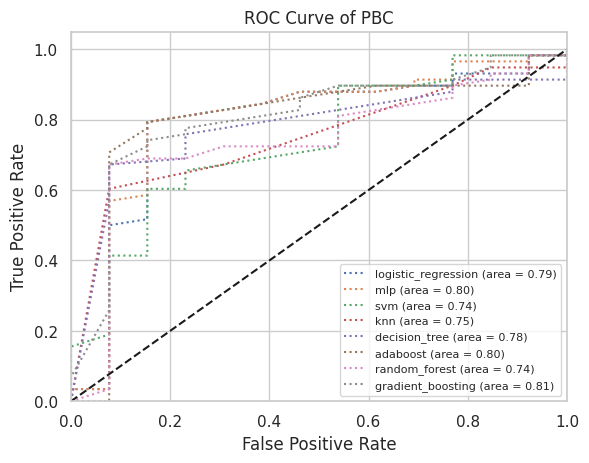

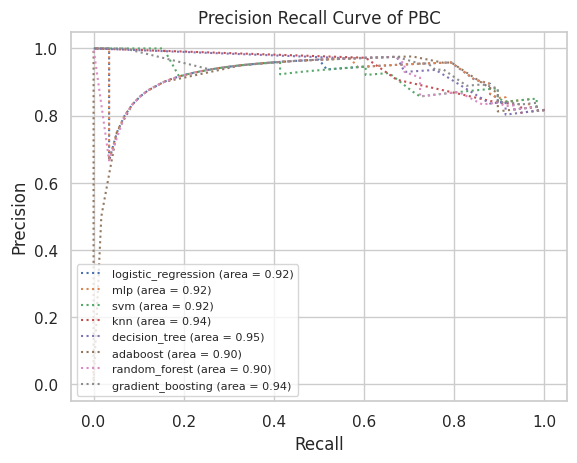

In [ ]:
plot_figures()

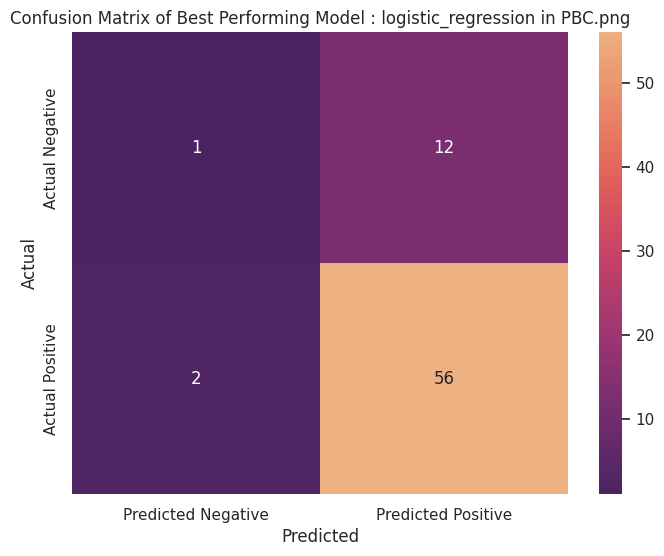

In [ ]:
plot_confusion_matrix('logistic_regression')


## Save the model

In [ ]:
param = {'svm__C': 10, 'svm__gamma': 'scale', 'svm__kernel': 'linear'}

In [ ]:
model = SVC(kernel='linear', gamma = 'scale', C = 10)
model.fit(X_train, y_train)

SVC(C=10, kernel='linear')

In [ ]:
model.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1])

In [ ]:
with open('model.pkl','wb') as f:
    pk.dump(model,f)

In [ ]:
X_test.head()

,ATTD1,ATTD2,ATTD3,ATTD4,SN1,SN2,SN3,SN4,PBC1,PBC2,PBC3,PBC4
261,3,3,3,4,1,4,3,3,4,2,3,2
330,3,3,3,2,4,4,3,3,1,2,2,3
292,3,3,2,2,3,3,3,4,5,4,4,5
6,3,4,3,2,3,3,3,4,4,2,4,4
263,3,3,3,5,1,2,3,1,3,3,3,3
